In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

import warnings 
warnings.filterwarnings('ignore')

In [99]:
data = pd.read_csv('data_preprocessing.csv')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [101]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [102]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [103]:
data[data['Salary'].isnull()]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes


In [104]:
data[data['Age'].isnull()]

,Country,Age,Salary,Purchased
6,Spain,NaN,52000.0,No


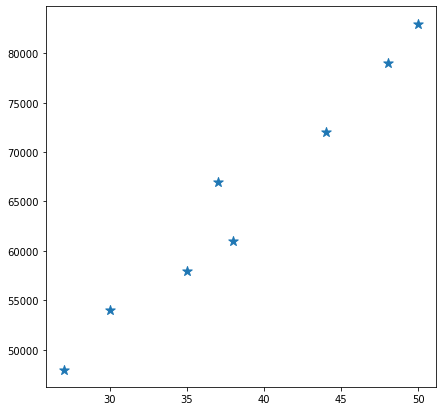

In [105]:
plt.figure(figsize = (7,7))
plt.scatter(x = data['Age'].values, y = data['Salary'].values, marker = '*', alpha = 1, s = 100)

In [106]:
data[(data['Salary'] > 0) & (data['Salary'] < 60000)]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No


In [107]:
data['Age'] = data['Age'].fillna(28)

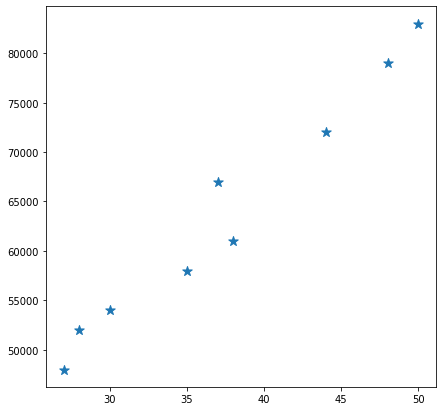

In [108]:
plt.figure(figsize = (7,7))
plt.scatter(x = data['Age'].values, y = data['Salary'].values, marker = '*', alpha = 1, s = 100)

In [109]:
data[(data['Age'] > 30) & (data['Age'] < 50)].sort_values(by = 'Age')

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
9,France,37.0,67000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
0,France,44.0,72000.0,No
7,France,48.0,79000.0,Yes


In [110]:
data['Salary'] = data['Salary'].fillna(64000)

In [111]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,64000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,28.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Handling Categorical data

In [112]:
#COnverting the categorical data to binary numbers 
data = pd.get_dummies(data, columns = ['Country','Purchased'],drop_first = True)

In [113]:
data

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,0,0,0
1,27.0,48000.0,0,1,1
2,30.0,54000.0,1,0,0
3,38.0,61000.0,0,1,0
4,40.0,64000.0,1,0,1
5,35.0,58000.0,0,0,1
6,28.0,52000.0,0,1,0
7,48.0,79000.0,0,0,1
8,50.0,83000.0,1,0,0
9,37.0,67000.0,0,0,1


In [114]:
data

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,0,0,0
1,27.0,48000.0,0,1,1
2,30.0,54000.0,1,0,0
3,38.0,61000.0,0,1,0
4,40.0,64000.0,1,0,1
5,35.0,58000.0,0,0,1
6,28.0,52000.0,0,1,0
7,48.0,79000.0,0,0,1
8,50.0,83000.0,1,0,0
9,37.0,67000.0,0,0,1


# Splitting the data into training and testing 

In [115]:
X = data.iloc[:,:4]

In [116]:
y = data['Purchased_Yes'].values

In [117]:
X[7:10]

,Age,Salary,Country_Germany,Country_Spain
7,48.0,79000.0,0,0
8,50.0,83000.0,1,0
9,37.0,67000.0,0,0


In [118]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = (X[:7], X[7:10], y[:7], y[7:10])

In [119]:
X_train

,Age,Salary,Country_Germany,Country_Spain
0,44.0,72000.0,0,0
1,27.0,48000.0,0,1
2,30.0,54000.0,1,0
3,38.0,61000.0,0,1
4,40.0,64000.0,1,0
5,35.0,58000.0,0,0
6,28.0,52000.0,0,1


In [120]:
X_test

,Age,Salary,Country_Germany,Country_Spain
7,48.0,79000.0,0,0
8,50.0,83000.0,1,0
9,37.0,67000.0,0,0


In [121]:
y_train

array([0, 1, 0, 0, 1, 1, 0], dtype=uint8)

In [122]:
y_test

array([1, 0, 1], dtype=uint8)

# Feature Scaling

In [123]:
#Standardizing the data

for i in range(len(data['Salary'])):
    data['Salary'][i] = (data['Salary'][i] - data['Salary'].mean()) / data['Salary'].std()
    
for i in range(len(data['Age'])):
    data['Age'][i] = (data['Age'][i] - data['Age'].mean()) / data['Age'].std()

In [124]:
data

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,0.786068,0.709078,0,0,0
1,-0.462172,-0.376803,0,1,1
2,-0.036221,0.075768,1,0,0
3,0.519042,0.438561,0,1,0
4,0.757052,0.661800,1,0,1
5,0.696293,0.654709,0,0,1
6,0.529377,0.643185,0,1,0
7,1.569831,1.512911,0,0,1
8,2.223717,2.135220,1,0,0
9,2.840017,2.846050,0,0,1


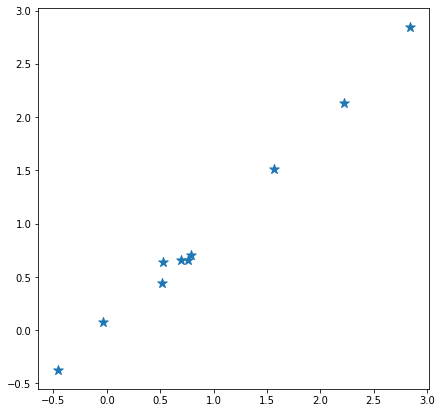

In [125]:
plt.figure(figsize = (7,7))
plt.scatter(x = data['Age'].values, y = data['Salary'].values, marker = '*', alpha = 1, s = 100)